In [2]:
import jieba

In [3]:
import pandas as pd     # 数据表
import numpy as np     # 数组
import re     # 正则表达式
import jieba     # 中文分词
import matplotlib.pyplot as plt     # 画图
from gensim.models import Word2Vec     # 训练词嵌入模型
# import gensim.downloader as api     # 导入云端的已训练好的词向量
from gensim.models import KeyedVectors     # 加载自己本地个性化的已训练好的词向量
from sklearn.metrics.pairwise import cosine_similarity     # 计算向量之间的余弦相似度
from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

In [4]:
df = pd.read_excel('text_analysis_ad.xlsx', index_col = 0)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


In [5]:
def remove_nums(text):
    nonums = re.sub('[^\u4e00-\u9fa5]+', '', text)
    return nonums
test = df['广告文本'][8]
remove_nums(test)

'世界惊奇的搜毒杀菌大发明有万兆杀菌力杀绝血中毒菌打破千古不治的血毒顽恶癣扫灭花柳各种毒症顽毒入骨狮标血药片乃德国名医赖回氏发明无论血毒顽癣恶癣见有红斑面热耳红皮肉浮肿虫行蚁咬毛发易脱等状花柳疳各种毒症及皮肤均扫灭无逍大瓶七元小瓶三元十八甫威永汉北老威十三行安乐大新公司先施公司十七甫仁寿一德路永雄医所代售'

In [6]:

# 加载中文停用词词典，可个性化设置
stopwords = open('stopwords.txt', encoding = 'utf-8').read()

def clean_text(text):
    words = jieba.cut(text)
    words = [w for w in words if w not in stopwords]
    return ' '.join(words)
test = df['广告文本'][8]
clean_text(test)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/2z/lsdn7dx57vjdrcfcymdsvdbr0000gn/T/jieba.cache
Loading model cost 0.332 seconds.
Prefix dict has been built successfully.


'世界 惊奇 搜毒 杀菌 发明 有万兆 杀菌 杀绝 血中 毒菌 打破 千古 不治 血毒 顽恶癣 扫灭 花柳 毒症 顽毒 入骨 狮标 血 药片 德国 名医 赖 回氏 发明 血毒 顽癣 恶癣 红斑 面热耳红 皮肉 浮肿 虫行 蚁 咬 毛发 易脱 状 花柳 疳 毒症 皮肤 均 扫灭 逍大瓶 七元 小瓶 三元 十八 甫 威 永汉北 老威 十三行 安乐 大新 先施 十七 甫 仁寿 一德路 永雄 医所 代售'

In [7]:
df['广告文本分词'] = df['广告文本'].apply(clean_text)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 售 国币 大洋 二角 ...
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 人生 本性 天理 人生 首贵 逐日 大便 通畅 有序 天然 所当 大便 不利 肠...
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""",香味 馥郁 不让 名花 炮台 出售
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 药片 此际 小儿 患 肠胃病 尤以 南方 ...
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 妇女 腻友 各国 妇女 力证 亚士 北罗 药片 药物 经验 知到 亚士 北...
...,...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 安住 蚊烟香 蚊见 逃 慌慌 暑夜 不用 帐 ...
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 威德 润肠 丸 之功 威德 润肠 丸系 草药 炼制 纯粹 和平 功能...
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 攃 如意 膏 可免 后果 皮肤 受伤 当以 灼烫 痛苦 震激 致命 治疗 灼烫 ...
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 花柳 梅毒 瘰 疮 疖 癣疥 筋骨 酸痛 四肢 麻木 半身 疯 症状 虽异...


In [8]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [9]:
corpus = df['广告文本分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:5]:
    print(document)

['兰勃', '脱白', '脱勒', '五华', '牌', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '售', '国币', '大洋', '二角', '五十', '枝装', '每罐', '售', '国币', '大洋', '五角']
['讲求', '卫生', '人生', '本性', '天理', '人生', '首贵', '逐日', '大便', '通畅', '有序', '天然', '所当', '大便', '不利', '肠阻塞', '胃失', '消化', '疾病', '头痛', '肝火', '胆汁', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '凡', '此皆须', '服用', '韦廉士', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '城', '医生', '学', '研究会', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '常为', '服用', '身体', '爽健为', '半生', '未有', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '上海', '四川', '路', '九十六', '号', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶']
['香味', '馥郁', '不让', '名花', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '讃', '羡', '婴孩', '药片', '此际', '小儿', '患', '肠胃病', '尤以', '南方', '天气', '翳', '热', '颣', '充斥', '之区', '刘君', '逹', '福州', '南台', '梅亭', '山馆', '家有', '差肩', '儿女', '均', '秀慧康', '强者', '果何法', '之乎', '刘君云', '贵局'

In [10]:

# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 10
)

# 保存训练好的模型
model.save('word2vec_ad.model')

In [11]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

韦廉士: [-0.07330868  0.43729785  0.2356199   0.5996822   0.04062165 -1.1573284
  0.5201326   2.083423   -0.5010254  -1.2031887  -0.10673544 -1.3383352
 -0.13982482  0.8315651   0.00986298 -0.13371265  1.0506072  -0.3431052
 -0.07423039 -1.916123    0.5026777   0.07339394  0.7421493  -0.15536317
 -0.01103271  0.29895577 -1.0470269   0.0617193  -0.6213158  -0.0147675
  1.0056828   0.1429915   0.6479619  -0.65462756 -0.07718648  0.8761931
  0.6664536   0.12682393 -0.2821341  -1.1754696  -0.03636937 -0.4600503
 -0.593993    0.2830381   0.21800679 -1.3729035  -0.57381845 -0.15822503
  0.75570714  0.86915857  0.09671643 -0.8556453  -0.7090212  -0.24817218
 -0.08812634  0.21257867  0.00540774 -0.19369748 -0.25722763  0.35276186
 -0.2192629   0.42603883  0.54564875 -0.06842998 -1.3421531   1.2230155
  0.29687428  0.156299   -0.83918214  0.82129073 -0.03689712  0.9137761
  0.5039802  -0.10564286  1.1219486   0.68729466  0.12158737  0.15073657
 -0.7274074   0.06140728 -0.8101509   0.05759564  0.00

In [12]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('医生', '疼痛'))
print(model.wv.similarity('医生', '神经'))
print(model.wv.similarity('医生', '伤风'))
print(model.wv.similarity('疼痛', '神经'))
print(model.wv.similarity('疼痛', '伤风'))
print(model.wv.similarity('神经', '伤风'))

0.68013465
0.67556065
0.5927059
0.9977723
0.98920125
0.9902254


findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeitiTC-Medium-01.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeitiTC-Medium-01.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeitiTC-Medium-01.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeitiTC-Medium-01.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeitiTC-Medium-01.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeitiTC-Medium-01.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeitiTC-Medium-01.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeitiTC-Medium-01.ttf
/Users/sharon/an

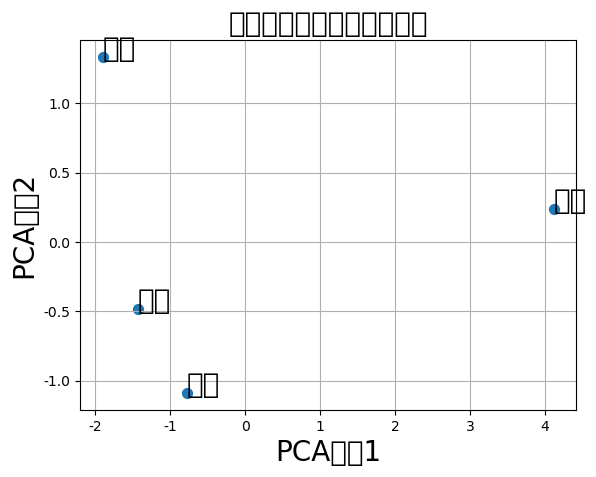

In [26]:
# 可视化

words = ['医生', '疼痛', '神经', '伤风']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图
from matplotlib import font_manager as fm, rcParams
plt.rcParams['font.sans-serif']=['STHeitiTC-Medium-01.ttf'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

In [27]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

# 保存训练好的模型
model.save('word2vec_ad.model')

Loss after epoch 0: 58554.3671875
Loss after epoch 1: 58494.7734375
Loss after epoch 2: 58544.9375
Loss after epoch 3: 58351.65625
Loss after epoch 4: 55771.296875
Loss after epoch 5: 49993.5625
Loss after epoch 6: 44642.71875
Loss after epoch 7: 41044.34375
Loss after epoch 8: 38711.0625
Loss after epoch 9: 37163.78125
Loss after epoch 10: 35891.8125
Loss after epoch 11: 34768.125
Loss after epoch 12: 33693.125
Loss after epoch 13: 32811.875
Loss after epoch 14: 31985.6875
Loss after epoch 15: 31228.0625
Loss after epoch 16: 30360.0625
Loss after epoch 17: 29444.6875
Loss after epoch 18: 28810.1875
Loss after epoch 19: 28174.25
Loss after epoch 20: 27353.0
Loss after epoch 21: 26936.125
Loss after epoch 22: 26376.5
Loss after epoch 23: 25870.625
Loss after epoch 24: 25220.375
Loss after epoch 25: 24951.8125
Loss after epoch 26: 24401.6875
Loss after epoch 27: 23975.1875
Loss after epoch 28: 23640.75
Loss after epoch 29: 23031.9375
Loss after epoch 30: 22751.875
Loss after epoch 31: 22